In [62]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('orders.csv', delimiter=',')
visitors = pd.read_csv('visitors.csv', delimiter=',')

In [3]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Предварительная обрабока данных

Таблица Orders

In [2]:
orders.info(memory_usage='deep')

NameError: name 'orders' is not defined

С названиями никаких правок не требуется

In [6]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пустые значения также отсутствуют

Выполняем поиск явных дубликатов, они отсутствуют

In [7]:
orders.duplicated().sum()

0

Ищем неявные дубликаты. Их нет

In [8]:
for nameCol in orders.columns.to_list():
    print(orders[nameCol].unique())

[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']
[   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970   18100     100    2750     570    2978    1440
    786

Преобразуем поле даты к типу pandas.datetime64

In [9]:
orders["date"] = orders["date"].astype(np.datetime64)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 105.3 KB


Таблица visitors

In [10]:
visitors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


С названиями никаких правок не требуется

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пустые значения также отсутствуют

Выполняем поиск явных дубликатов, они отсутствуют

In [12]:
visitors.duplicated().sum()

0

Ищем неявные дубликаты. Их нет

In [13]:
for nameCol in visitors.columns.to_list():
    print(visitors[nameCol].unique())

['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
['A' 'B']
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]


Преобразуем поле даты к типу pandas.datetime64[ns]

In [14]:
visitors["date"] = visitors["date"].astype(np.datetime64)
visitors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


Выполним поиск пересекающихся пользователей в таблице orders и удалим их (183 единицы)

In [15]:
ordersGroupA = orders[orders['group'] == 'A']
ordersGroupB = orders[orders['group'] == 'B']

In [16]:
delCnt = 0
for indexA, rowOrderA in ordersGroupA.iterrows():
    for indexB, rowOrderB in ordersGroupB.iterrows():
        if rowOrderA['visitorId'] == rowOrderB['visitorId']:
            orders = orders.drop(orders[orders.visitorId == rowOrderA['visitorId']].index)
            delCnt += 1
            continue
            
print('Deleted ')
print(delCnt)

Deleted 
183


Создали массив уникальных пар дат и групп теста

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим кумулятивные агрегированные даные по дням о заказах

In [18]:
ordersAgreagated = datesGroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group'])
        ].
        agg({'date' : 'max', 
             'group' : 'max', 
             'transactionId' : 'nunique', 
             'visitorId' : 'nunique', 
             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAgreagated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Получим кумулятивные агрегированные данные по дням о посетителях

In [19]:
visitorsAggregated = datesGroups.apply(lambda x: 
    visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])
    ].
    agg({'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим данные в одну таблицу, изменив названия столбцов

In [20]:
cumulativeData = ordersAgreagated
cumulativeData = cumulativeData.join(visitorsAggregated.drop(['date', 'group'], axis=1), sort=False)
cumulativeData.rename(columns={'transactionId': 'orders', 'visitorId': 'byers'}, inplace=True)
cumulativeData.head()

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
66,2019-08-01,B,17,17,59758,713
175,2019-08-02,A,42,36,234381,1338
173,2019-08-02,B,40,39,221801,1294
291,2019-08-03,A,66,60,346854,1845


Разделим получившийся датафрейм

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

In [22]:
cumulativeRevenueA.head()

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
175,2019-08-02,A,42,36,234381,1338
291,2019-08-03,A,66,60,346854,1845
499,2019-08-04,A,77,71,388030,2562
719,2019-08-05,A,99,92,474413,3318


In [23]:
cumulativeRevenueB.head()

,date,group,orders,byers,revenue,visitors
66,2019-08-01,B,17,17,59758,713
173,2019-08-02,B,40,39,221801,1294
383,2019-08-03,B,54,53,288850,1803
498,2019-08-04,B,68,66,385740,2573
699,2019-08-05,B,89,87,475648,3280


Согласно варианту 3 - изобразим график конверсии по группам А и B. 

По оси 
x – date, по оси y – конверсия.

На основании полученного графика можем сделать вывод, что: у группы А с течением времени наблюдается спад количества заказов к посещениям, при этом этот спад происходит довольно резко и в последствии держистя стабильно низко, у группы B с течением времени наблюдается быстрый рост данного показателя в первый промежуток времени, но далее стабилизируется на среднем значении

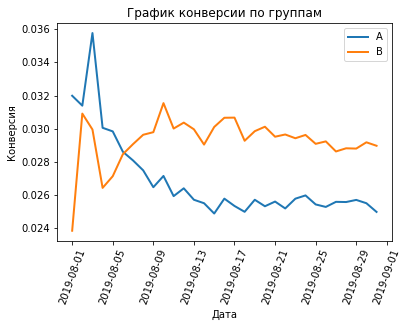

In [24]:
fig, ax = plt.subplots()

ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], linewidth=2.0, label = 'A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], linewidth=2.0, label = 'B')

ax.set_title('График конверсии по группам')

ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия')

ax.tick_params(axis='x', rotation=70)

ax.legend()

plt.show()

Таблица log_exp

In [25]:
log_exp = pd.read_csv('logs_exp.csv', delimiter='\t')

In [26]:
log_exp.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [27]:
log_exp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


In [28]:
log_exp.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Выполняем поиск явных дубликатов, найдено 413 единиц

In [29]:
log_exp.duplicated().sum()

413

Удалим их, теперь их 0

In [30]:
log_exp = log_exp.drop_duplicates().reset_index()
log_exp.duplicated().sum()

0

Ищем неявные дубликаты. Их нет

In [31]:
for nameCol in log_exp.columns.to_list():
    print(log_exp[nameCol].unique())

[     0      1      2 ... 244123 244124 244125]
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]
[1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]
[246 248 247]


Выведем на экран количество каждого события в порядке убывания частоты.

In [32]:
dfP5 = log_exp
dfP5['Count'] = [1 for i in range(0, len(dfP5))]
dfP5 = dfP5[['EventName', 'Count']]
print(dfP5.groupby('EventName').count().sort_values(by='Count', ascending=False))

                          Count
EventName                      
MainScreenAppear         119101
OffersScreenAppear        46808
CartScreenAppear          42668
PaymentScreenSuccessful   34118
Tutorial                   1018


Чаще всего совершается событие MainScreenAppear

Подсчитаем количество пользователей, которые совершали каждое из этих действий

In [33]:
print(log_exp.groupby('EventName').agg(
    {'DeviceIDHash': ['nunique']}))

                        DeviceIDHash
                             nunique
EventName                           
CartScreenAppear                3749
MainScreenAppear                7439
OffersScreenAppear              4613
PaymentScreenSuccessful         3547
Tutorial                         847


Определим количество пользователей в каждой группе

In [34]:
print(log_exp.groupby('ExpId').agg(
    {'DeviceIDHash': ['count']}))

      DeviceIDHash
             count
ExpId             
246          80181
247          77950
248          85582


Найдём пользователей, которые присутствуют в обоих группах

In [35]:
a = log_exp.groupby('DeviceIDHash').agg(
    {'ExpId': ['nunique']})
print(log_exp.groupby('DeviceIDHash').agg(
    {'ExpId': ['nunique']}))

                      ExpId
                    nunique
DeviceIDHash               
6888746892508752          1
6909561520679493          1
6922444491712477          1
7435777799948366          1
7702139951469979          1
...                     ...
9217594193087726423       1
9219463515465815368       1
9220879493065341500       1
9221926045299980007       1
9222603179720523844       1

[7551 rows x 1 columns]


Не нашли таких пользователей

In [36]:
for el in a.itertuples():
    a1, a2 = el
    if a2 > 1:
        print(a1)

In [58]:
def test_groups(group_a, group_b, event, alpha):
    #получим количество успехов
    group_users = np.array([log_exp.query('EventName == @event and ExpId == @group_a').DeviceIDHash.nunique(),
                            log_exp.query('EventName == @event and ExpId == @group_b').DeviceIDHash.nunique()])
    #получим количество пользователей в группах
    total_users = np.array([log_exp.query('ExpId == @group_a').DeviceIDHash.nunique(),
                            log_exp.query('ExpId == @group_b').DeviceIDHash.nunique()])
    # пропорция успехов в первой группе:
    p1 = group_users[0]/total_users[0]
    # пропорция успехов во второй группе:
    p2 = group_users[1]/total_users[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])
    # разница пропорций в датасетах
    difference = p1 - p2 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1]))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1) 
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: есть значимая разница между долями')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Проведём А\А тест:<br>
Нулевая гипотеза - группы 246 и 247 не имеют различий<br>
Альтернативная гипотеза - группа 246 и 247 отличаются

In [79]:
test_groups(246, 247, 'MainScreenAppear', 0.01)

p-значение:  0.5856639791209877
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Исходя из теста делаем вывод, что люди в группах 246 и  247 не имеют различий в 99.99%

In [77]:
test_groups(246, 248, 'MainScreenAppear', 0.01)
test_groups(247, 248, 'MainScreenAppear', 0.01)

p-значение:  0.39774960182882513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.7632160970326178
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Исходя из тестов можно сдлеать вывод, что в группах нет отличий по действиям пользователей

Вывод: 

В ходе выполнения данной лабораторной работы изучил алгоритмы для проведения A/B тестирования для
принятия решений.